<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/Regeneron_Pharmaceuticals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install  yfinance

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

In [10]:
REGN = "REGN" 

In [11]:
REGN = yfinance.download(REGN)

REGN

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-04-02,22.000000,23.250000,20.750000,21.125000,21.125000,2294100
1991-04-03,21.250000,21.250000,17.000000,18.250000,18.250000,1716100
1991-04-04,18.250000,19.500000,17.750000,18.000000,18.000000,810600
1991-04-05,18.500000,18.500000,17.750000,17.750000,17.750000,238200
1991-04-08,18.000000,18.000000,17.500000,17.625000,17.625000,200100
...,...,...,...,...,...,...
2020-09-21,551.140015,556.460022,542.159973,555.700012,555.700012,682500
2020-09-22,552.359985,573.450012,552.359985,571.510010,571.510010,580500
2020-09-23,572.369995,578.159973,562.489990,565.190002,565.190002,535600


In [12]:
REGN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-04-02,22.00,23.25,20.75,21.125,21.125,2294100
1991-04-03,21.25,21.25,17.00,18.250,18.250,1716100
1991-04-04,18.25,19.50,17.75,18.000,18.000,810600
1991-04-05,18.50,18.50,17.75,17.750,17.750,238200
1991-04-08,18.00,18.00,17.50,17.625,17.625,200100


In [13]:
REGN.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-21,551.140015,556.460022,542.159973,555.700012,555.700012,682500
2020-09-22,552.359985,573.450012,552.359985,571.510010,571.510010,580500
2020-09-23,572.369995,578.159973,562.489990,565.190002,565.190002,535600
2020-09-24,561.000000,564.989990,554.700012,557.460022,557.460022,457900
2020-09-25,555.400024,575.919983,551.000000,574.059998,574.059998,643600


In [14]:
REGN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7.430000e+03
mean,117.324695,119.226178,115.292101,117.301056,117.301056,5.322388e+05
std,168.822422,171.218664,166.206796,168.775002,168.775002,7.137209e+05
min,3.125000,3.375000,3.000000,3.000000,3.000000,2.600000e+03
25%,12.500000,12.850000,12.000000,12.480000,12.480000,1.314000e+05
50%,19.545000,20.040001,19.000000,19.515000,19.515000,4.145500e+05
75%,229.462502,234.407505,227.047501,229.485001,229.485001,7.178500e+05
max,658.000000,664.640015,646.500000,658.210022,658.210022,2.833050e+07


In [15]:
REGN.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close   Volume
Date                                                                           
1991-04-02   22.000000   23.250000   20.750000   21.125000   21.125000  2294100
1991-04-03   21.250000   21.250000   17.000000   18.250000   18.250000  1716100
1991-04-04   18.250000   19.500000   17.750000   18.000000   18.000000   810600
1991-04-05   18.500000   18.500000   17.750000   17.750000   17.750000   238200
1991-04-08   18.000000   18.000000   17.500000   17.625000   17.625000   200100
...                ...         ...         ...         ...         ...      ...
2020-09-21  551.140015  556.460022  542.159973  555.700012  555.700012   682500
2020-09-22  552.359985  573.450012  552.359985  571.510010  571.510010   580500
2020-09-23  572.369995  578.159973  562.489990  565.190002  565.190002   535600
2020-09-24  561.000000  564.989990  554.700012  557.460022  557.460022   457900
2020-09-

In [16]:
REGN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7430 entries, 1991-04-02 to 2020-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7430 non-null   float64
 1   High       7430 non-null   float64
 2   Low        7430 non-null   float64
 3   Close      7430 non-null   float64
 4   Adj Close  7430 non-null   float64
 5   Volume     7430 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 406.3 KB


In [17]:
conn = sqlite3.connect("REGN.db")
c = conn.cursor()

In [18]:
conn = sqlite3.connect("REGN.db")
c = conn.cursor()

In [19]:
REGN.to_sql("REGN", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [20]:
#See data
c.execute("""SELECT * FROM REGN""")
rows = c.fetchall()
rows

[('1991-04-02 00:00:00', 22.0, 23.25, 20.75, 21.125, 21.125, 2294100),
 ('1991-04-03 00:00:00', 21.25, 21.25, 17.0, 18.25, 18.25, 1716100),
 ('1991-04-04 00:00:00', 18.25, 19.5, 17.75, 18.0, 18.0, 810600),
 ('1991-04-05 00:00:00', 18.5, 18.5, 17.75, 17.75, 17.75, 238200),
 ('1991-04-08 00:00:00', 18.0, 18.0, 17.5, 17.625, 17.625, 200100),
 ('1991-04-09 00:00:00', 18.0, 18.0, 16.0, 16.0, 16.0, 319000),
 ('1991-04-10 00:00:00', 16.0, 16.25, 15.5, 15.875, 15.875, 582100),
 ('1991-04-11 00:00:00', 16.0, 16.5, 14.75, 14.75, 14.75, 319400),
 ('1991-04-12 00:00:00', 14.75, 16.5, 14.75, 16.25, 16.25, 329700),
 ('1991-04-15 00:00:00', 16.5, 16.75, 16.0, 16.125, 16.125, 171400),
 ('1991-04-16 00:00:00', 16.375, 16.375, 16.0, 16.125, 16.125, 130500),
 ('1991-04-17 00:00:00', 16.375, 16.375, 15.25, 15.25, 15.25, 187600),
 ('1991-04-18 00:00:00', 15.5, 15.5, 14.5, 15.25, 15.25, 320300),
 ('1991-04-19 00:00:00', 15.25, 15.25, 14.625, 14.875, 14.875, 68900),
 ('1991-04-22 00:00:00', 14.875, 14.875, 1

In [21]:
REGN.to_excel("REGN.xls")

pd.read_excel("REGN.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-04-02,22.000000,23.250000,20.750000,21.125000,21.125000,2294100
1,1991-04-03,21.250000,21.250000,17.000000,18.250000,18.250000,1716100
2,1991-04-04,18.250000,19.500000,17.750000,18.000000,18.000000,810600
3,1991-04-05,18.500000,18.500000,17.750000,17.750000,17.750000,238200
4,1991-04-08,18.000000,18.000000,17.500000,17.625000,17.625000,200100
...,...,...,...,...,...,...,...
7425,2020-09-21,551.140015,556.460022,542.159973,555.700012,555.700012,682500
7426,2020-09-22,552.359985,573.450012,552.359985,571.510010,571.510010,580500
7427,2020-09-23,572.369995,578.159973,562.489990,565.190002,565.190002,535600
7428,2020-09-24,561.000000,564.989990,554.700012,557.460022,557.460022,457900


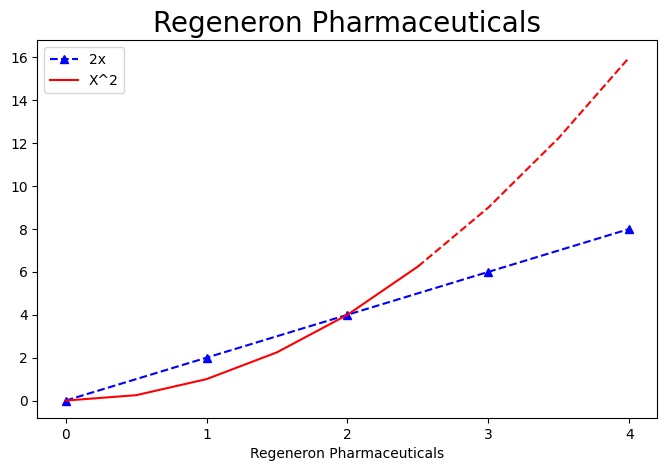

In [22]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Regeneron Pharmaceuticals', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Regeneron Pharmaceuticals')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

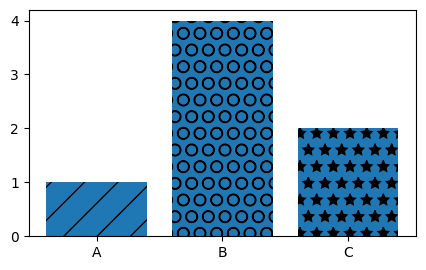

In [23]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()